# Week-17 Homework Assignment

### 1. What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

#### Inductive reasoning:
Inductive reasoning, its like looking for a pattern or trend and then generalizing the information based on what is known 
or observed.

Example: When shopping online, we select the product and inference the product quality based on the reviews and rating. In 
    the same way we choose to watch movies based on IMDB ratings

####    Deductive reasoning:
Deductive reasoning, is taking some set of data or some set of facts and using that to come up with other, or deducing some
other facts that you know are true. when you generalize you don't know necessarily whether the trend will continue, but you
assume it will, you don't know 100% it will be true but,with deductive reasoning you know it will be true.

Example: when you have a 9:00am appointment with Doctor and you know that it takes 30 minutes to drive from home to the 
       hospital. From those two facts, you deduce that you will have to leave your home by 8:30am to be on time.

Using ONE of the following sources, complete the questions for only that source. 

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.





### 2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 


The dataset consists of 14 feature variables and 1 class label that determine the loan approval decision.
All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
We do not even have the features names but we know the data has continuous or categorical columns. Based on that 
we can similarly label which columns are continuous (N), categorical (C) and if they require further encoding as
(C_enc) in the dataset.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler

In [70]:
data = np.genfromtxt(r'C:\Users\rsagu\Downloads\australian.dat',
                     names='C1, N2, N3, C4_enc, C5_enc, C6_enc, N7, C8, C9, N10, C11, C12_enc, N13, N14, Target',
                     dtype=None,
                     delimiter=' ')
dat_df = pd.DataFrame(data) 
dat_df

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [93]:
# checking for statistics of the dataset
dat_df.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [73]:
dat_df.isna().sum()
dat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       690 non-null    int32  
 1   N2       690 non-null    float64
 2   N3       690 non-null    float64
 3   C4_enc   690 non-null    int32  
 4   C5_enc   690 non-null    int32  
 5   C6_enc   690 non-null    int32  
 6   N7       690 non-null    float64
 7   C8       690 non-null    int32  
 8   C9       690 non-null    int32  
 9   N10      690 non-null    int32  
 10  C11      690 non-null    int32  
 11  C12_enc  690 non-null    int32  
 12  N13      690 non-null    int32  
 13  N14      690 non-null    int32  
 14  Target   690 non-null    int32  
dtypes: float64(3), int32(12)
memory usage: 48.6 KB


In [95]:
# splitthe data into features and Target Variables
X = dat_df.iloc[:, :-1].values
y = dat_df.iloc[:, -1].values

### Data Preprocessing: One Hot Encoding & Standardization

In [96]:
# One Hot Encoding the columns: 3, 4, 5, 11
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
        transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'),[3, 4, 5, 11])],
        remainder = 'passthrough')

X = ct.fit_transform(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [97]:
# Splitting dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 1)

### 3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

As the dataset is a binary classification problem we can build the Binary classification model to predict if the credit
was approved or rejected to customers.
First we see the model performance using DecisionTreeClassifier using different parameters.

In [80]:
# Import necessary modules
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [4, None],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"],
             "splitter": ["best", "random"]}

# Instantiate a Decision Tree classifier: tree
tree = tree.DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 7, 'splitter': 'best'}
Best score is 0.8622768222768222


 After tuning the model we got the best score to be 86% which turns to be the good model performance.

In [81]:
# Import tree
from sklearn import tree
best_model = tree.DecisionTreeClassifier(criterion ='entropy', max_depth =5, max_features=7,
                                        min_samples_leaf=5, splitter='best', random_state = 42)

In [82]:
# test the model performance
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        82
           1       0.70      0.93      0.80        56

    accuracy                           0.81       138
   macro avg       0.82      0.83      0.81       138
weighted avg       0.84      0.81      0.81       138



Looking at the precision and recall values we can tell that the model performance is Excellent. 
Also, the time performance for the given set of data is fast.


### 4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [128]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Instantiate RandomForestClassifier
rf = RandomForestClassifier(n_estimators=170, criterion='entropy', min_samples_split=5, min_samples_leaf=2, 
                            max_features='auto', bootstrap=True, n_jobs=-1, random_state=1)

# Fit it to the data
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# rf.score(X_test, y_test)

In [129]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

[[67 10]
 [ 7 54]]
0.8768115942028986


In [104]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [106]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [108]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [110]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.8768115942028986
[[66 11]
 [ 6 55]]


In [111]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [112]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 1300}

In [113]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.8768115942028986
[[70  7]
 [10 51]]


The model performance after tunning does not impact much but we also see that the performance slightly changed from 86 to 87

### 5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [152]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100, booster='gbtree', base_score=0.5, objective='binary:logistic', 
                    random_state=7)

xgb.fit(X_train, y_train)
print(xgb)

# y_pred = xgb.predict(X_test)
# print(classification_report(y_test, y_pred))

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [153]:
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.41%


The accuracy with the XGBClassifier is 83% which is quite reasonable.

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8892910368320204


Text(0, 0.5, 'True Positive Rate')

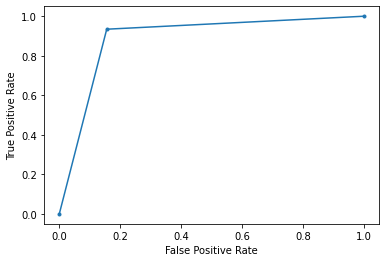

In [149]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

The area under the curve here gives the clear idea of credit approved or rejected to customers.
As we can see area under the curve falls to 89% that means its the good model. 


### 6.	Which model performed best? What is your performance metric? Why? 

From all the above classification models i performed, xgboost model gives the best performance metric which is 88% accuracy,
next comes the random forest modelwhich is 87% then comes the Decision Tree Model which is 86%.

Even thought there is not much improvment in the model performance. We can see how after tuning the slight changes in the model improved step by step.

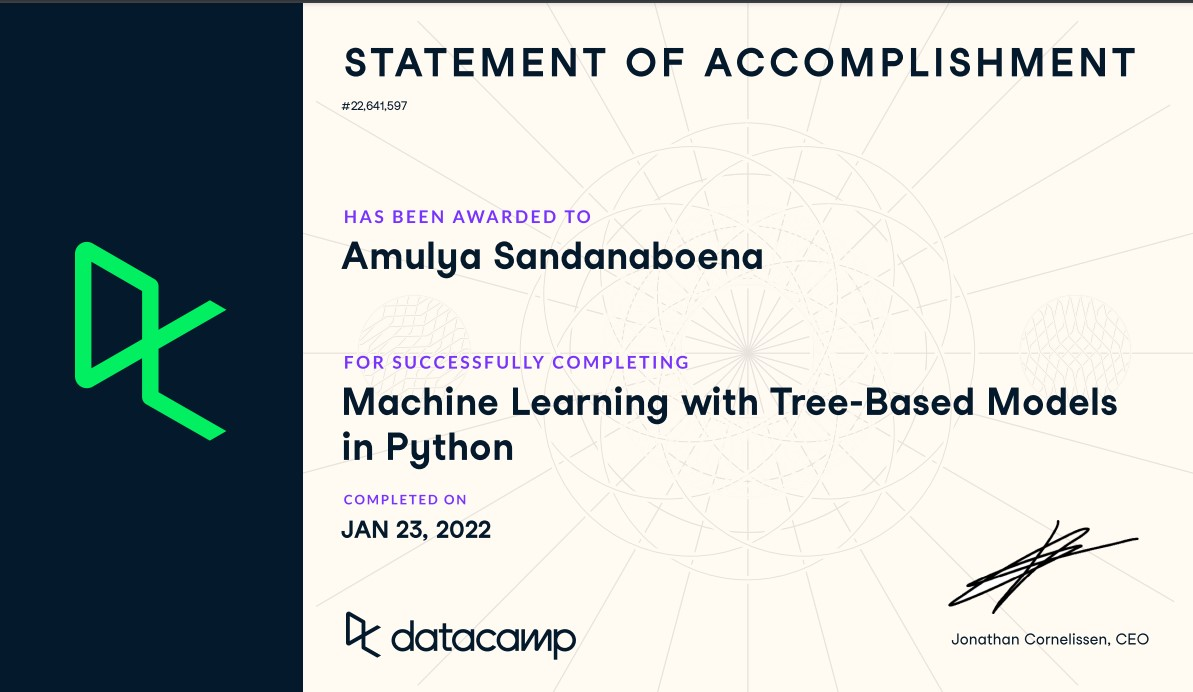